In [16]:
import sys, time, os
from pathlib import Path
import copy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from landlab.components import FlowAccumulator, PriorityFloodFlowRouter, ChannelProfiler, BedrockLandslider
from landlab.io.netcdf import read_netcdf
from landlab.utils import get_watershed_mask
from landlab import imshowhs_grid, imshow_grid
from landlab.io import read_esri_ascii, write_esri_ascii
from landlab import RasterModelGrid

from bmi_topography import Topography

In [22]:
topo = Topography(
    dem_type="SRTMGL1",
    api_key = '1f3ea82738663688170f0d898b59ca1d',
    south=43.972829,
    north=44.013602,
    west=-123.860848,
    east=-123.795973,
    output_format="AAIGrid",
    cache_dir="DEMData//"
    )
#43.972829 -123.860266 xmin ymin
#44.013602 -123.795973 xmax ymax


In [23]:
fname = topo.fetch()
print(fname)


/home/jupyter-uarkjill@gmail.com-9c6e7/ivy/DEMData/SRTMGL1_43.972829_-123.860848_44.013602_-123.795973.asc


In [24]:
dem = topo.load()
print(dem)

<xarray.DataArray 'SRTMGL1' (band: 1, y: 147, x: 234)>
array([[[ 93, 100, ..., 299, 291],
        [101, 108, ..., 303, 298],
        ..., 
        [338, 331, ..., 334, 356],
        [332, 323, ..., 350, 369]]], dtype=int32)
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 44.01 44.01 44.01 44.01 ... 43.97 43.97 43.97 43.97
  * x        (x) float64 -123.9 -123.9 -123.9 -123.9 ... -123.8 -123.8 -123.8
Attributes:
    transform:   (0.000277777778, 0.0, -123.860972222215, 0.0, -0.00027777777...
    res:         (0.000277777778, 0.000277777778)
    is_tiled:    0
    nodatavals:  (-32768.0,)
    scales:      (1.0,)
    offsets:     (0.0,)
    units:       meters
    location:    node


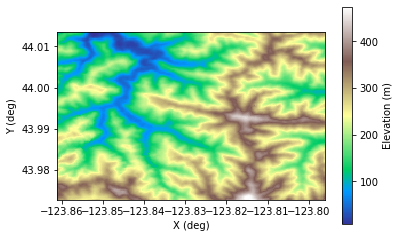

In [25]:
# Read DEM as Lanlab grid
grid_geog, elev = read_esri_ascii(fname, name='topographic__elevation')    
#Show dem
plt.figure()
cmap = copy.copy(mpl.cm.get_cmap("terrain"))
imshow_grid(grid_geog, 'topographic__elevation',cmap =cmap,
            grid_units=("deg", "deg"),colorbar_label="Elevation (m)")
plt.show()

In [26]:
# make a new grid with RasterModelGrid, use the dimensions of grid_geog
grid = RasterModelGrid ((grid_geog.number_of_node_rows, grid_geog.number_of_node_columns), 30)
# grid.add_field(...
grid.add_field('topographic__elevation', elev, at = 'node')

array([ 332.,  323.,  316., ...,  302.,  299.,  291.])

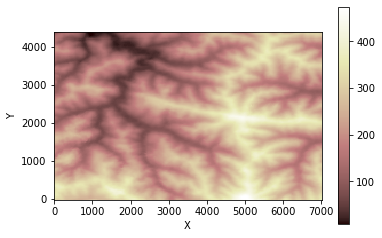

In [27]:
# Plot this one with imshowhs_grid
imshow_grid(grid,'topographic__elevation') 